In [66]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Veri setini yükleme
uploaded = files.upload()

# Sütun adlarını elle belirleme
sütun_adları = ['Number of times pregnant', 'Plasma glucose concentration a 2 hours', 'Diastolic blood pressure (mm Hg)',
                'Triceps skinfold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index',
                'Diabetes pedigree function', 'Age (years)', 'Class variable']

# Veri setini yükleme ve sütun adlarını belirleme
veri = pd.read_csv("veriseti.txt", sep="\t", names=sütun_adları)

# Sayısal özelliklerin belirlenmesi (Hedef değişken hariç)
numerical_features = ['Number of times pregnant', 'Plasma glucose concentration a 2 hours',
                      'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
                      '2-Hour serum insulin (mu U/ml)', 'Body mass index', 'Diabetes pedigree function',
                      'Age (years)']

# Veri setindeki dolu satırları filtreleme
veri_dolu = veri.dropna()

# Dolu satırları kullanarak yeni bir veri seti oluşturma
X = veri_dolu[numerical_features]

# Eksik değerleri doldurmak için bir SimpleImputer nesnesi oluşturma
imputer = SimpleImputer(strategy='mean')  # Eksik değerleri ortalama ile dolduruyoruz, isteğe bağlı olarak medyan veya en sık değer de kullanılabilir

# Eksik değerleri doldurma işlemi
X_imputed = imputer.fit_transform(X)

# Normalizasyon için StandardScaler nesnesini oluşturma
scaler = StandardScaler()

# Veri setini normalleştirme
X_normalized = scaler.fit_transform(X_imputed)

# Normalleştirilmiş veriyi kullanarak yeni bir DataFrame oluşturma
veri_normalleştirilmiş = pd.DataFrame(X_normalized, columns=numerical_features)

# Normalleştirilmiş veri setini gösterme
print(veri_normalleştirilmiş.head())

Saving veriseti.txt to veriseti (23).txt
   Number of times pregnant  Plasma glucose concentration a 2 hours  \
0                  0.639947                                0.848324   
1                 -0.844885                               -1.123396   
2                  1.233880                                1.943724   
3                 -0.844885                               -0.998208   
4                 -1.141852                                0.504055   

   Diastolic blood pressure (mm Hg)  Triceps skinfold thickness (mm)  \
0                          0.149641                         0.907270   
1                         -0.160546                         0.530902   
2                         -0.263941                        -1.288212   
3                         -0.160546                         0.154533   
4                         -1.504687                         0.907270   

   2-Hour serum insulin (mu U/ml)  Body mass index  \
0                       -0.692891         0.2

In [67]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# PCA modeli oluşturma ve en yüksek iki öz değer için boyut indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# LDA modeli oluşturma ve en yüksek iki öz değer için boyut indirgeme
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_normalized, veri['Class variable'])

# PCA için en ayırt edici özniteliklerin raporlanması
print("PCA için en ayırt edici öznitelikler:")
for i in range(len(pca.components_)):
    print(f"{i+1}. Öznitelik: {numerical_features[abs(pca.components_[i]).argmax()]}")

# LDA için en ayırt edici özelliklerin raporlanması
print("LDA için en ayırt edici özellikler:")
for i in range(len(lda.scalings_[0])):
    print(f"{i+1}. Öznitelik: {numerical_features[abs(lda.scalings_[0][i]).argmax()]}")

PCA için en ayırt edici öznitelikler:
1. Öznitelik: Body mass index
2. Öznitelik: Age (years)
LDA için en ayırt edici özellikler:
1. Öznitelik: Number of times pregnant


Saving veriseti.txt to veriseti (24).txt
Çoklu Doğrusal Regresyon (PCA) MSE: 0.1932524794651608
Çoklu Doğrusal Regresyon (PCA) MAE: 0.3776739135882019
Multinominal Lojistik Regresyon (PCA) Doğruluk: 0.7359307359307359

Multinominal Lojistik Regresyon (PCA) Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       151
           1       0.65      0.53      0.58        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



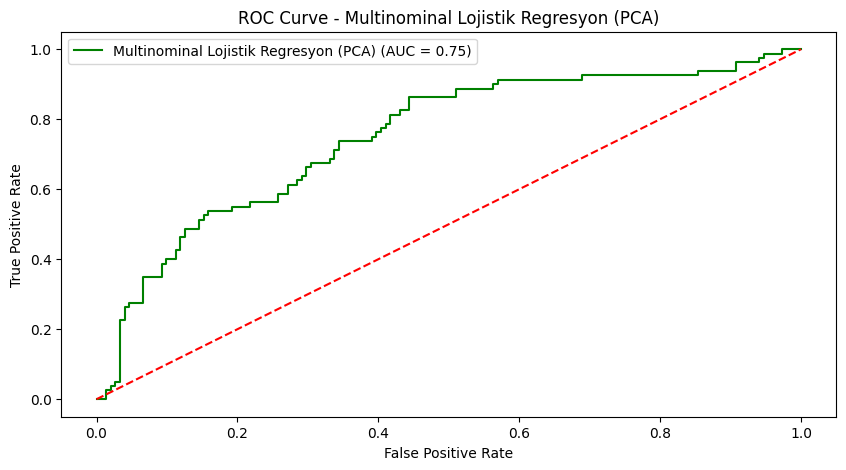

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

# Veri setini yükleme
uploaded = files.upload()

# Eksik değerleri doldurmak için bir SimpleImputer nesnesi oluşturma
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(veri.drop(columns=["Class variable"]))

# Özellikleri ve hedef değişkeni ayırma
X = X_imputed
y = veri["Class variable"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veri setini normalizasyon
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA uygulama
pca = PCA(n_components=5)  # Örnek olarak 5 bileşen seçildi
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Çoklu Doğrusal Regresyon modelini oluşturma ve eğitme (PCA uygulanmış veri ile)
linear_regression_model_pca = LinearRegression()
linear_regression_model_pca.fit(X_train_pca, y_train)

# Multinominal Lojistik Regresyon modelini oluşturma ve eğitme (PCA uygulanmış veri ile)
logistic_regression_model_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_regression_model_pca.fit(X_train_pca, y_train)

# Tahminleri yapma (PCA uygulanmış veri ile)
y_pred_linear_pca = linear_regression_model_pca.predict(X_test_pca)
y_pred_logistic_pca = logistic_regression_model_pca.predict(X_test_pca)

# Performans metriklerini hesaplama (PCA uygulanmış veri ile)
mse_linear_pca = mean_squared_error(y_test, y_pred_linear_pca)
mae_linear_pca = mean_absolute_error(y_test, y_pred_linear_pca)
accuracy_logistic_pca = accuracy_score(y_test, y_pred_logistic_pca)
classification_report_logistic_pca = classification_report(y_test, y_pred_logistic_pca)

# Çıktıları raporlama
print("Çoklu Doğrusal Regresyon (PCA) MSE:", mse_linear_pca)
print("Çoklu Doğrusal Regresyon (PCA) MAE:", mae_linear_pca)
print("Multinominal Lojistik Regresyon (PCA) Doğruluk:", accuracy_logistic_pca)
print("\nMultinominal Lojistik Regresyon (PCA) Sınıflandırma Raporu:")
print(classification_report_logistic_pca)

# Multinominal Lojistik Regresyon modeli için ROC eğrisini çizme (PCA uygulanmış veri ile)
y_prob_logistic_pca = logistic_regression_model_pca.predict_proba(X_test_pca)[:, 1]
fpr_logistic_pca, tpr_logistic_pca, thresholds_logistic_pca = roc_curve(y_test, y_prob_logistic_pca)
roc_auc_logistic_pca = roc_auc_score(y_test, y_prob_logistic_pca)

plt.figure(figsize=(10, 5))
plt.plot(fpr_logistic_pca, tpr_logistic_pca, label=f'Multinominal Lojistik Regresyon (PCA) (AUC = {roc_auc_logistic_pca:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinominal Lojistik Regresyon (PCA)')
plt.legend()
plt.show()

Saving veriseti.txt to veriseti (25).txt

Karar Ağacı Yapısı:
Karar Ağacı Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       151
           1       0.88      0.80      0.84        80

    accuracy                           0.89       231
   macro avg       0.89      0.87      0.88       231
weighted avg       0.89      0.89      0.89       231

Karar Ağacı Doğruluk Oranı: 0.8917748917748918


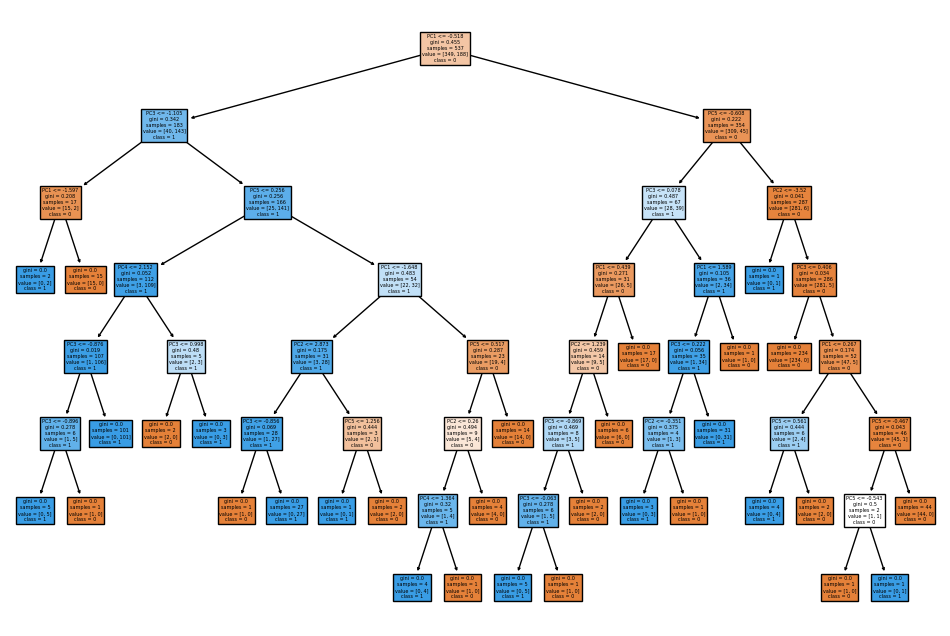

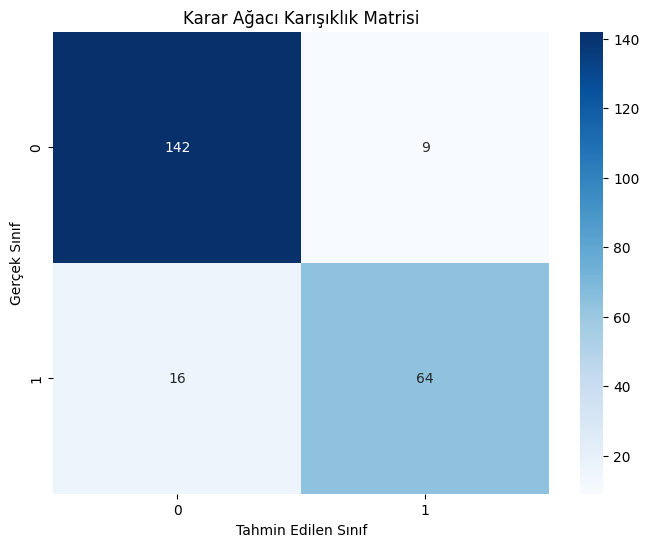

Budanmış Karar Ağacı Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       151
           1       0.90      0.82      0.86        80

    accuracy                           0.91       231
   macro avg       0.91      0.89      0.90       231
weighted avg       0.91      0.91      0.91       231

Budanmış Karar Ağacı Doğruluk Oranı: 0.9090909090909091


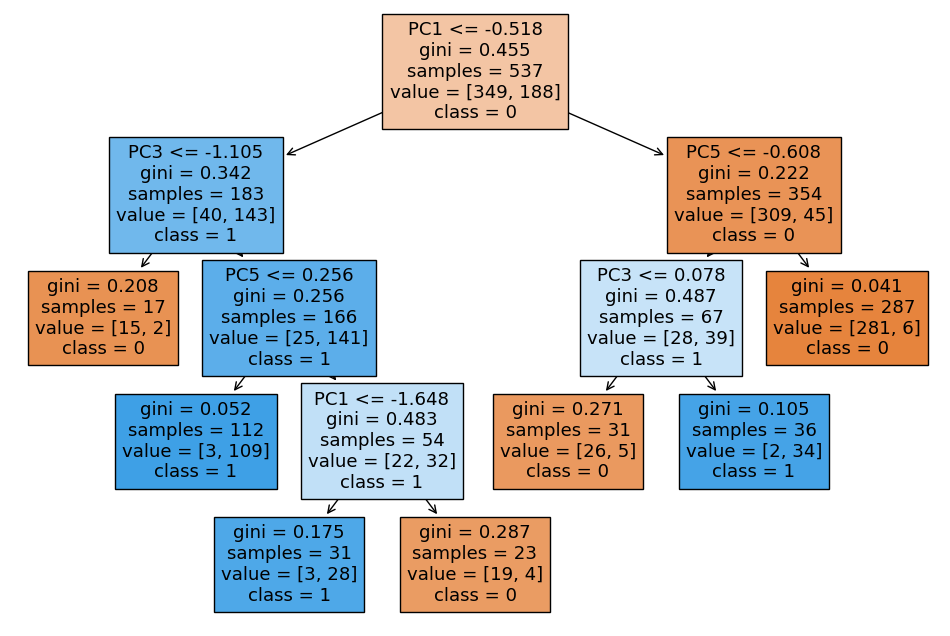

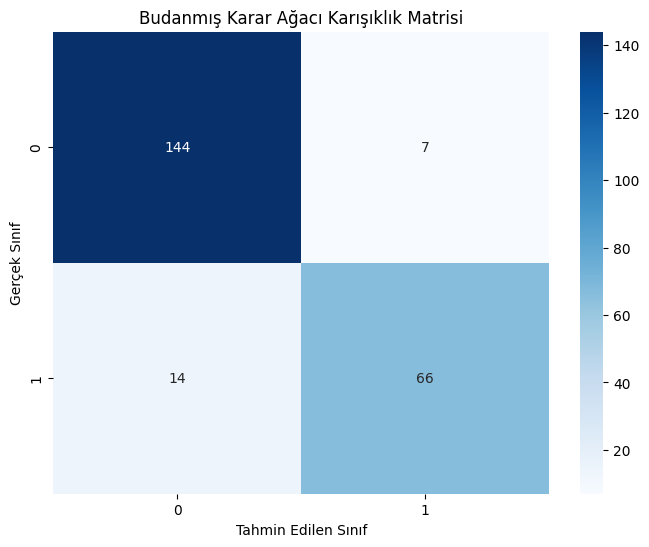

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Veri setini yükleme
uploaded = files.upload()

# Veri setini normalizasyon
scaler = StandardScaler()
normalized_data = scaler.fit_transform(veri)

# PCA uygulama
pca = PCA(n_components=5)  # Örnek olarak 5 bileşen seçildi
principal_components = pca.fit_transform(normalized_data)

# PCA sonuçlarını DataFrame'e dönüştürme
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(pca_df, y_temiz, test_size=0.3, random_state=42)

# Karar ağacı modelini oluşturma ve eğitme
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Test verisi için tahmin yapma ve performans metriklerinin hesaplanması
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Karar ağacı yapısının raporlanması
print("\nKarar Ağacı Yapısı:")

# Karar ağacı için sınıflandırma raporu
report_tree = classification_report(y_test, y_pred_tree)
print("Karar Ağacı Sınıflandırma Raporu:\n", report_tree)

# Test verisi üzerindeki doğruluk oranını yazdır
print("Karar Ağacı Doğruluk Oranı:", accuracy_tree)

# Karar ağacı için karışıklık matrisi
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Karar ağacını çizme
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=pca_df.columns, class_names=['0', '1'], filled=True)
plt.show()

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, cmap='Blues', fmt='g', xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karar Ağacı Karışıklık Matrisi')
plt.show()

# Budanmış karar ağacını oluşturma ve eğitme
pruned_decision_tree = DecisionTreeClassifier(ccp_alpha=0.01)  # ccp_alpha değerini isteğe bağlı olarak ayarlayabilirsiniz
pruned_decision_tree.fit(X_train, y_train)

# Test verisi için tahmin yapma ve performans metriklerinin hesaplanması
y_pred_pruned_tree = pruned_decision_tree.predict(X_test)
accuracy_pruned_tree = accuracy_score(y_test, y_pred_pruned_tree)

# Karar ağacı için sınıflandırma raporu
report_pruned_tree = classification_report(y_test, y_pred_pruned_tree)

# Karar ağacı için karışıklık matrisi
cm_pruned_tree = confusion_matrix(y_test, y_pred_pruned_tree)

# Budanmış Karar ağacı için sınıflandırma raporu
print("Budanmış Karar Ağacı Sınıflandırma Raporu:\n", report_pruned_tree)

# Budanmış karar ağacı doğruluk oranını yazdır
print("Budanmış Karar Ağacı Doğruluk Oranı:", accuracy_pruned_tree)

# Budanmış karar ağacını görselleştirme
plt.figure(figsize=(12, 8))
plot_tree(pruned_decision_tree, feature_names=pca_df.columns, class_names=['0', '1'], filled=True)
plt.show()

# Budanmış karar ağacı için karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pruned_tree, annot=True, cmap='Blues', fmt='g', xticklabels=pruned_decision_tree.classes_, yticklabels=pruned_decision_tree.classes_)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Budanmış Karar Ağacı Karışıklık Matrisi')
plt.show()

Naive Bayes Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Naive Bayes Doğruluk Oranı: 0.7445887445887446


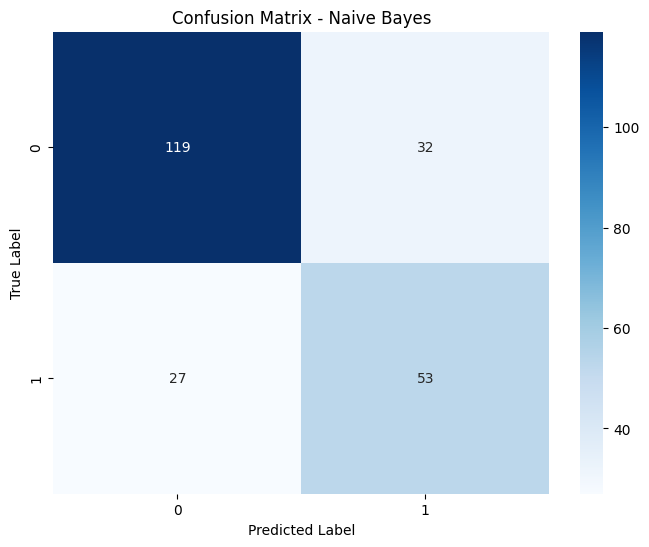

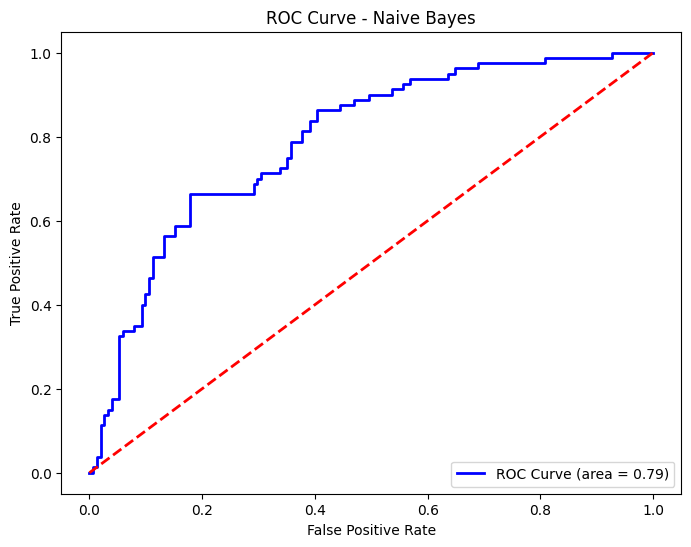

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import accuracy_score

# Veri setini oku
data = pd.read_csv("veriseti.txt", delimiter="\t", header=None)

# Boş değerleri 0 olarak doldur
data.fillna(0, inplace=True)

# Veri ve hedef değişkeni ayrıştır
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını eğit
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Test verisi için tahminler yap
y_pred_nb = naive_bayes.predict(X_test)

# Sınıflandırma raporunu ve karışıklık matrisini yazdır
print("Naive Bayes Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nb))

# Naive Bayes modelinin tahminleri ile olasılık skorlarını al
y_prob_nb = naive_bayes.predict_proba(X_test)

# Doğruluk oranını hesapla
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Doğruluk Oranı:", accuracy_nb)

# Karışıklık matrisini görselleştir
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# ROC eğrisi için false positive oranı (fpr) ve true positive oranı (tpr) hesapla
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb[:, 1])

# ROC eğrisini çizdir
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_nb[:, 1]))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()